In [1]:
from ligeor import TwoGaussianModel as TwoG
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def test_initialize_filename(filename, data):
    model = TwoG(filename=filename, n_downsample=1, delimiter=',')
    assert(((model.phases == data[:,0]) & (model.fluxes == data[:,1]) & (model.sigmas == data[:,2])).all())

    
def test_initialize_data(data):
    model = TwoG(phases=data[:,0], fluxes=data[:,1], sigmas=data[:,2])
    assert(((model.phases == data[:,0]) & (model.fluxes == data[:,1]) & (model.sigmas == data[:,2])).all())
    return model


def test_estimate_ecl_pos_widths(model, result):
    est_positions = model.estimate_eclipse_positions_widths(model.phases, model.fluxes)
    estimates = {}
    estimates['pos1'] = est_positions['ecl_positions'][0]
    estimates['pos2'] = est_positions['ecl_positions'][1]
    estimates['width1'] = est_positions['ecl_widths'][0]
    estimates['width2'] = est_positions['ecl_widths'][1]
    
    for key in result.keys():
        assert(np.abs(estimates[key] - result[key]) < 2e-1)
    

def test_fit(model, result):
    model.fit()
    assert(((model.best_fit['func'] == result['func'])
          & np.abs(
              np.array(model.best_fit['param_vals']) - 
              np.array(result['param_vals'])) < 
               1e-4*np.ones(len(model.best_fit['param_vals']))).all())
    return model
    
    
def test_compute_ecl_params(model, result):
    eb_dict = model.compute_eclipse_params()
    for key in eb_dict.keys():
        if key in result.keys():
            assert(np.abs(eb_dict[key] - result[key]) < 1e-4)
        else:
            assert(np.isnan(eb_dict[key]))

In [3]:
C = 1.
mu1 = 0.
sigma1 = 0.015
d1 = 0.5
mu2 = 0.42
sigma2 = 0.01
d2 = 0.35
Aell = 0.05
phi01 = 0.
phi02 = 0.42

In [4]:
data_c = np.loadtxt('../data/const.csv', delimiter=',')
data_cg = np.loadtxt('../data/cg.csv', delimiter=',')
data_ce = np.loadtxt('../data/ce.csv', delimiter=',')
data_cge = np.loadtxt('../data/cge.csv', delimiter=',')
data_cg12 = np.loadtxt('../data/cg12.csv', delimiter=',')
data_cg12e1 = np.loadtxt('../data/cg12e1.csv', delimiter=',')
data_cg12e2 = np.loadtxt('../data/cg12e2.csv', delimiter=',')

In [5]:
model_c = test_initialize_data(data_c)
model_cg = test_initialize_data(data_cg)
model_ce = test_initialize_data(data_ce)
model_cge = test_initialize_data(data_cge)
model_cg12 = test_initialize_data(data_cg12)
model_cg12e1 = test_initialize_data(data_cg12e1)
model_cg12e2 = test_initialize_data(data_cg12e2)

In [6]:
model_cge.fit()

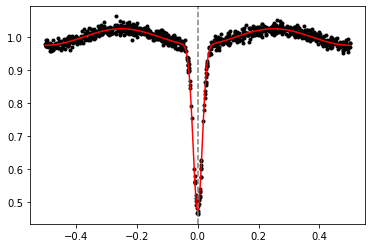

In [7]:
plt.plot(model_cge.phases, model_cge.fluxes, 'k.')
plt.plot(model_cge.phases, model_cge.best_fit['model'], 'r-')
plt.axvline(x=model_cge.best_fit['param_vals'][0][-1], c='grey', ls='--')

In [8]:
model_cg12e2.fit()

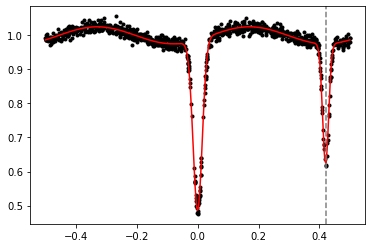

In [9]:
plt.plot(model_cg12e2.phases, model_cg12e2.fluxes, 'k.')
plt.plot(model_cg12e2.phases, model_cg12e2.best_fit['model'], 'r-')
plt.axvline(x=model_cg12e2.best_fit['param_vals'][0][-1], c='grey', ls='--')

In [10]:
def test_cg12e1():
    data = np.loadtxt('../data/cg12e1.csv', delimiter=',')
    model = TwoG(phases=data[:,0], fluxes=data[:,1], sigmas=data[:,2])
    result_fit = {'func': 'CG12E', 'param_vals': [C, mu1, d1, sigma1, mu2, d2, sigma2, Aell, phi01]}
    model.fit()
    return model

def test_cg12e2():
    data = np.loadtxt('../data/cg12e2.csv', delimiter=',')
    model = TwoG(phases=data[:,0], fluxes=data[:,1], sigmas=data[:,2])
    result_fit = {'func': 'CG12E', 'param_vals': [C, mu1, d1, sigma1, mu2, d2, sigma2, Aell, phi02]}
    model.fit()
    return model

In [11]:
model_1 = test_cg12e1()
model_2 = test_cg12e2()

In [12]:
model_1.best_fit['param_vals'][0]

array([ 1.00002780e+00, -4.67205427e-06,  5.00024691e-01,  1.49941718e-02,
        4.20044848e-01,  3.50972192e-01,  9.98374628e-03,  5.01076805e-02,
        4.99948558e-01])

(array([  4.,  22.,  96., 226., 273., 228., 103.,  38.,   9.,   1.]),
 array([-0.0324823 , -0.02538972, -0.01829714, -0.01120456, -0.00411198,
         0.0029806 ,  0.01007317,  0.01716575,  0.02425833,  0.03135091,
         0.03844349]),
 <BarContainer object of 10 artists>)

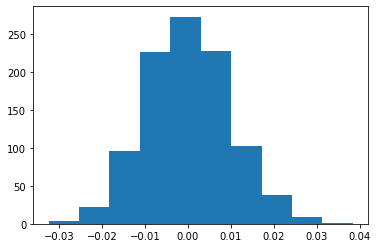

In [13]:
plt.hist((model_1.fluxes - model_1.best_fit['model']))

In [14]:
np.std((model_1.fluxes - model_1.best_fit['model']))

0.009781973714560828

In [15]:
ecl=2
mu_ind = model_1.best_fit['param_names']

In [24]:
model_1.best_fit['param_names']

['C', 'mu1', 'd1', 'sigma1', 'mu2', 'd2', 'sigma2', 'Aell', 'phi0']

In [23]:
model_1.best_fit['param_vals'][0]

array([ 1.00002780e+00, -4.67205427e-06,  5.00024691e-01,  1.49941718e-02,
        4.20044848e-01,  3.50972192e-01,  9.98374628e-03,  5.01076805e-02,
        4.99948558e-01])

In [17]:
model_1.compute_residuals_stdev()

(0.00016319903687338254, 0.009781973714560828)

In [21]:
model_1.compute_eclipse_area(ecl=1)

1 3 2


0.018697296609825834